## Load libraries

In [17]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
sns.set(style='darkgrid')

## Read in data

In [2]:
# Read in train and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Get first 5 rows of train data
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
# Get column names and types
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [4]:
# Get number of columns and rows in train and test data
print("Train data:", train.shape)
print("Test data:", test.shape)

Train data: (3000, 23)
Test data: (4398, 22)


In [5]:
# Summarize continuous variables in train dataframe
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [6]:
# Summarize continuous variables in test dataframe
test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


We note that in both the test and train datasets, there is a movie with 0 runtime which is likely wrong because a movie cannot be 0 minutes long. Additionally, there is a movie with 0 budget which is likely another mistake.

## Missing Data

In [7]:
# Count number of missing values in each column
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [8]:
# Get percentage of missingness for each column
perc_miss = train.isnull().sum() / train.shape[0] * 100
perc_miss

id                        0.000000
belongs_to_collection    79.866667
budget                    0.000000
genres                    0.233333
homepage                 68.466667
imdb_id                   0.000000
original_language         0.000000
original_title            0.000000
overview                  0.266667
popularity                0.000000
poster_path               0.033333
production_companies      5.200000
production_countries      1.833333
release_date              0.000000
runtime                   0.066667
spoken_languages          0.666667
status                    0.000000
tagline                  19.900000
title                     0.000000
Keywords                  9.200000
cast                      0.433333
crew                      0.533333
revenue                   0.000000
dtype: float64

In [9]:
# Only get index and values of variables that are missing
# Remove fully observed variables
missing_vars = perc_miss[perc_miss > 0]

# Sort values
missing_vars = missing_vars.sort_values(ascending=False)

In [10]:
missing_vars

belongs_to_collection    79.866667
homepage                 68.466667
tagline                  19.900000
Keywords                  9.200000
production_companies      5.200000
production_countries      1.833333
spoken_languages          0.666667
crew                      0.533333
cast                      0.433333
overview                  0.266667
genres                    0.233333
runtime                   0.066667
poster_path               0.033333
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

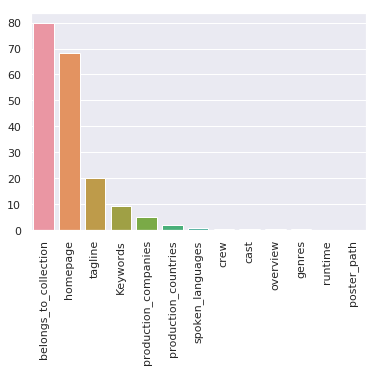

In [11]:
# Visualize missing data
sns.barplot(missing_vars.index, missing_vars.values)
plt.xticks(rotation=90)

## Response Variable: Revenue

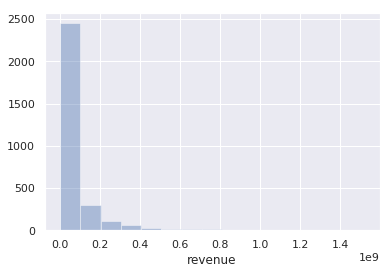

In [12]:
# Create histogram of response variable: revenue
sns.distplot(train["revenue"], bins=15, kde=False)

We see that the data is very right skewed (tail goes to the right), so we can fix this by taking the log of revenue.

In [13]:
# Create new variable log_revenue
train["log_revenue"] = np.log(train["revenue"])

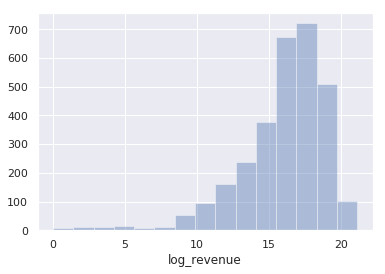

In [14]:
# Create histogram of log_revenue
sns.distplot(train['log_revenue'], bins=15, kde=False)

## belongs_to_collection

In [15]:
# Look at first entry
train['belongs_to_collection'][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

## genres

In [16]:
# Look at first 5 entries: notice that some movies have multiple genres
train['genres'].head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

In [148]:
# Create a function to remove genre using regex
def genre_processing(row):
    '''create a list of genres for each movie'''
    # empty list to get genres
    genre_list = []
    
    if type(row['genres']) != type('hello'): # not a string
        genre_list.append('Missing')
        return genre_list
    else:
        str = row['genres']
        # first separate by brackets { }
        lst = re.split("},", str)
        # group genre name
        for i in lst:
            genre = re.findall('.+\W\w+\W\:\s\'(.+)\'', i)
            genre_list.append(genre[0])  
        return genre_list

In [149]:
# Create new column which contains a list of all genres for each movie
train['genre_types'] = train.apply(genre_processing, axis = 1)

In [154]:
# Create a dictionary, initialize it empty first
genre_dict = dict()

# Iterate through each row
for index, row in train.iterrows():
    lst = row['genre_types']
    for i in lst:
        if i not in genre_dict.keys():  # check if key in dictionary
            genre_dict[i] = 1  # add new key to dictionary with count value of 1
        else:
            genre_dict[i] += 1  # update counter for genre

In [155]:
genre_dict

{'Comedy': 1028,
 'Drama': 1531,
 'Family': 260,
 'Romance': 571,
 'Thriller': 789,
 'Action': 741,
 'Animation': 141,
 'Adventure': 439,
 'Horror': 301,
 'Documentary': 87,
 'Music': 100,
 'Crime': 469,
 'Science Fiction': 290,
 'Mystery': 225,
 'Foreign': 31,
 'Fantasy': 232,
 'War': 100,
 'Western': 43,
 'History': 132,
 'Missing': 7,
 'TV Movie': 1}

In [156]:
print('There are', len(genre_dict), 'different genres.')

There are 21 different genres.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

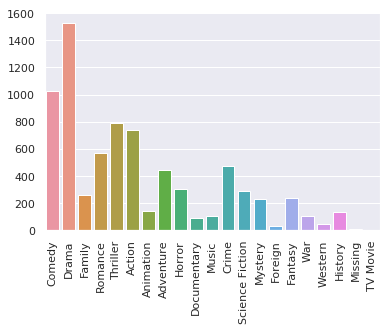

In [157]:
# Visualize genre counts
sns.barplot(list(genre_dict.keys()), list(genre_dict.values()))
plt.xticks(rotation=90)

In [ ]:
# One-hot encode